<a href="https://colab.research.google.com/github/gigikenneth/time-series/blob/main/ts1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = 'Cleaned_data.csv'

air = pd.read_csv(data_path)

In [3]:
air.head()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time,day_of_month,month,year,days_of_week,day_in_week,weekdays_end,hour,AM_PM,Air_quality
0,198,89,50,40.78,2021-07-26,16:45:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
1,199,89,50,40.09,2021-07-26,16:48:03,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
2,200,89,50,37.93,2021-07-26,16:49:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
3,201,89,50,33.18,2021-07-26,16:54:03,26,July,2021,0,Monday,Weekdays,16,PM,Moderate
4,202,89,50,37.84,2021-07-26,16:55:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy


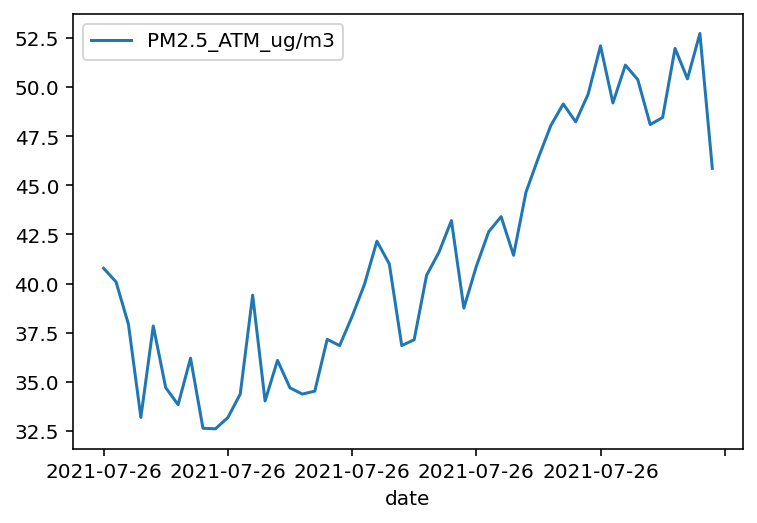

In [4]:
air[:5*10].plot(x='date', y='PM2.5_ATM_ug/m3')

In [5]:
air.tail()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time,day_of_month,month,year,days_of_week,day_in_week,weekdays_end,hour,AM_PM,Air_quality
56047,56245,87,61,29.17,2021-10-25,09:28:43,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56048,56246,87,61,29.57,2021-10-25,09:30:43,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56049,56247,87,61,28.75,2021-10-25,09:32:44,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56050,56248,87,61,29.97,2021-10-25,09:34:44,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56051,56249,87,60,30.25,2021-10-25,09:36:44,25,October,2021,0,Monday,Weekdays,9,AM,Moderate


In [6]:
air.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,day_of_month,year,days_of_week,hour
count,56052.000000,56052.000000,56052.000000,56052.000000,56052.000000,56052.0,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926,15.534450,2021.0,3.019607,11.685988
std,16180.962981,4.319505,8.550730,42.205997,9.000277,0.0,2.027295,6.842374
min,198.000000,70.000000,29.000000,0.780000,1.000000,2021.0,0.000000,0.000000
25%,14210.750000,82.000000,61.000000,30.170000,8.000000,2021.0,1.000000,6.000000
50%,28223.500000,84.000000,68.000000,41.450000,15.000000,2021.0,3.000000,12.000000
75%,42236.250000,87.000000,71.000000,61.190000,23.000000,2021.0,5.000000,18.000000
max,56249.000000,108.000000,89.000000,568.080000,31.000000,2021.0,6.000000,23.000000


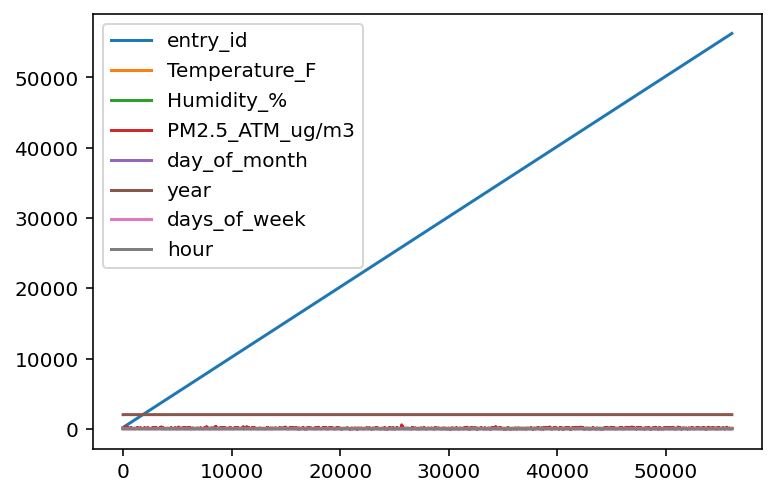

In [7]:
air.plot()

In [8]:
df = air

In [12]:
df.drop(df.columns[[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]], axis = 1, inplace = True)

In [14]:
df.head()

,PM2.5_ATM_ug/m3,date
0,40.78,2021-07-26
1,40.09,2021-07-26
2,37.93,2021-07-26
3,33.18,2021-07-26
4,37.84,2021-07-26


In [15]:
df.describe()

,PM2.5_ATM_ug/m3
count,56052.000000
mean,54.391926
std,42.205997
min,0.780000
25%,30.170000
50%,41.450000
75%,61.190000
max,568.080000


In [26]:
#rename column 
df1 = df.rename(columns={'PM2.5_ATM_ug/m3': 'PM'})

In [29]:
df1.head()

,PM,date
0,40.78,2021-07-26
1,40.09,2021-07-26
2,37.93,2021-07-26
3,33.18,2021-07-26
4,37.84,2021-07-26


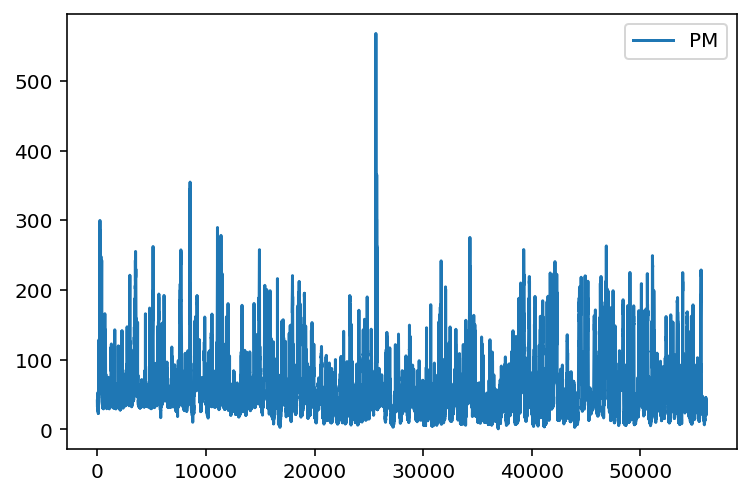

In [32]:
#visualization
df1.plot()

In [33]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [34]:
test_result=adfuller(df1['PM'])

In [35]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(PM):
    result=adfuller(PM)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [36]:
adfuller_test(df1['PM'])

ADF Test Statistic : -15.795135077417605
p-value : 1.0904996078551422e-28
#Lags Used : 59
Number of Observations Used : 55992
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
